In [1]:
#classification and decision trees

__Regression__ creates a model that best fits our
data

__Classification__ creates a model that separates the
data into classes

Decision tree is a classification method,made by splitting features into seperate ro

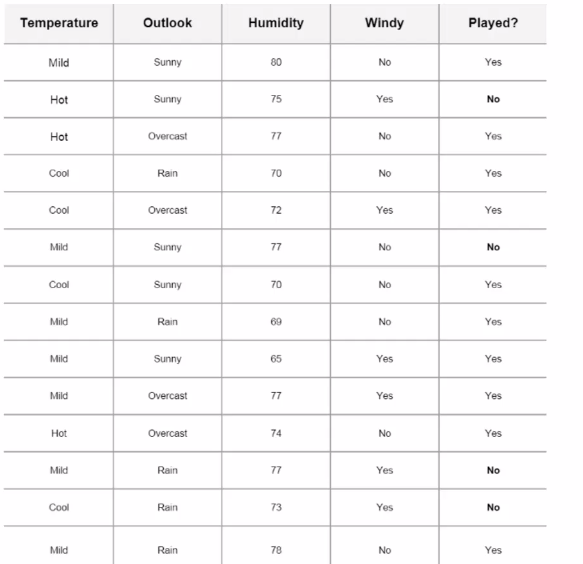

This dataset can be onverted into a decision tree like such 
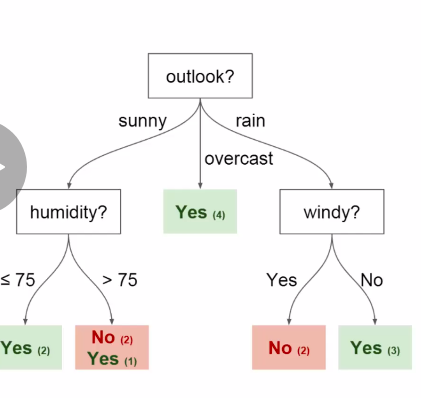

The **rootnode** is the first feature examined when continuing down the decision tree. Whereas **leaves** are the terminal nodes, that predict the output. Where as **decision nodes** are each condition, that examines a feature in order to predict the final output. 

The intuition of this method is based on using the most imporant feature as the rootnode. In the example above, is the the most derterminted feature to split on, when comparing with the other features.

A decision tree is a greedy algorithm which means it searches for the optimal solution at every step, regardless
the following steps



**Entropy** is a term that measures a degree of randomness. **Low** entropy means **order**, whereas **high** entropy means **low order**


casting a die has higher entropy than throwing a coin because each outcome of a
die toss (⅙) has a smaller probability than coin landing on heads or tails (½)
throw a coin, which has identical sides – the result is expected – min entropy = 0

##  Entropy and information gain

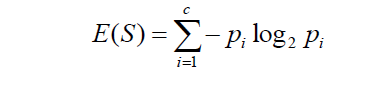

**Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty**

In this formular 'pi' is simpply the probability that an entry is the type of an element/class 'i' in our dataset.7
If we have **100** datapoints 
where **30** where **negative** and
**70** where **positive**

we can write out that formula like this:

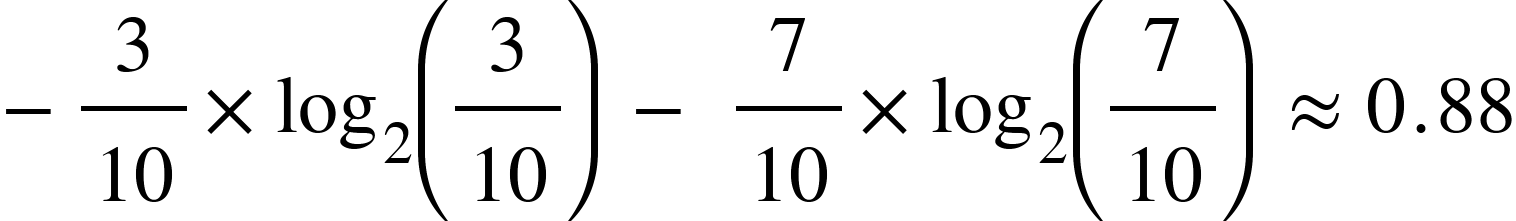

This image shows how the entropy distributes based on the data, that we have in our dataset. 
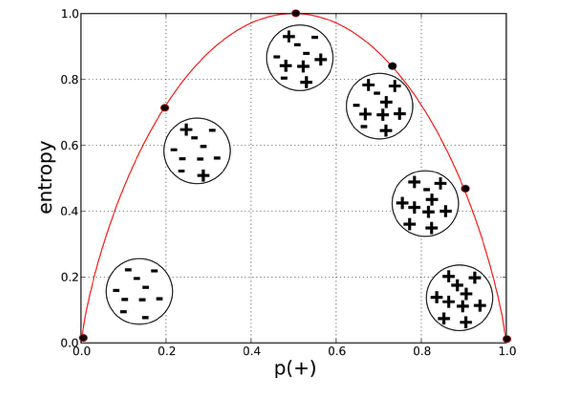

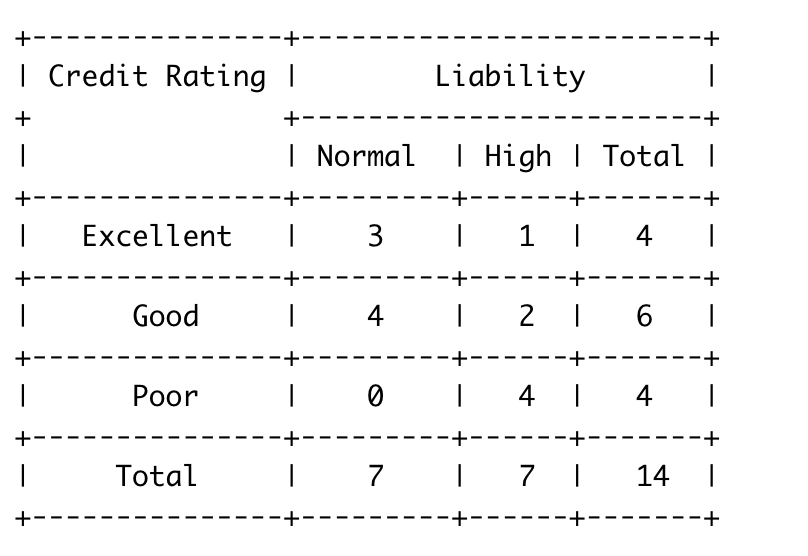


If we examined the dataset above we can then use a Entropy formula to examine the overall entropy in the dataset. If we directly examine the normal vs high liablity 

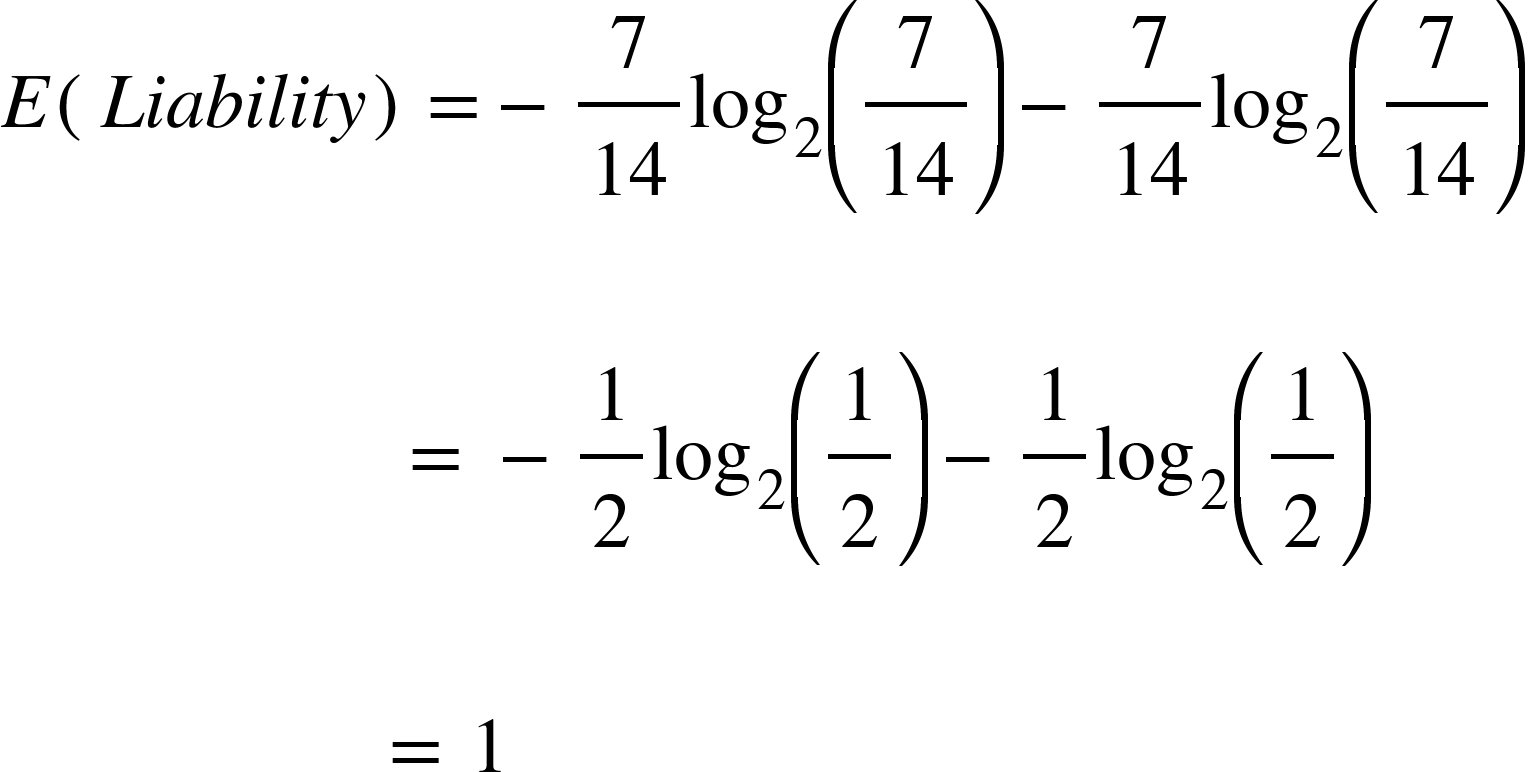


The probability is the highest possible = 1. Because there is a 50/50 split between normal and high liability. 
Hereafter we can examine the entropy vlaues for each of the target variables, where we add **additional information** (the target variables), and then examined the entropy value of those features. 

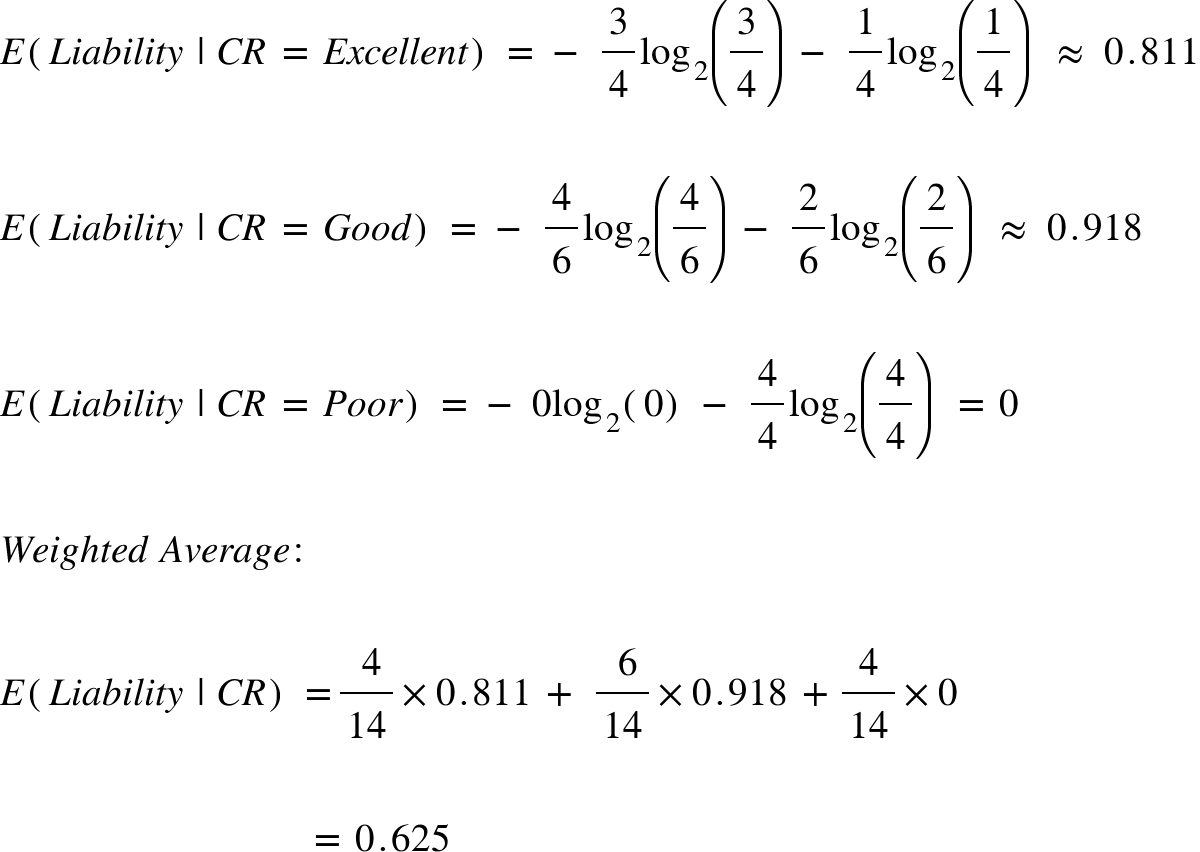

We have taken in the feature *credit rating*. We can now compute the information gain on libality from *credit Rating* to see how informative this feature is.
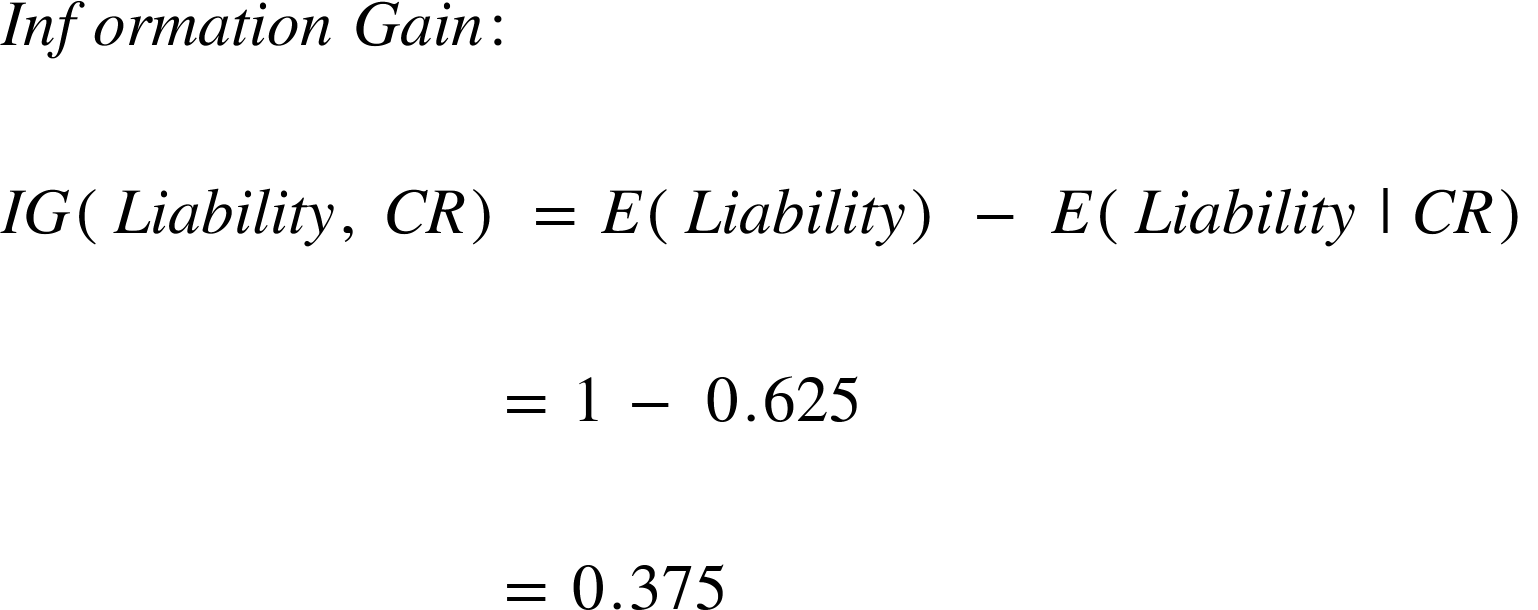

These formulars are used for the **decision tree** to **derterminate which feature is the most informative** and therefore which **feature should be implemented into the tree first**


An example:
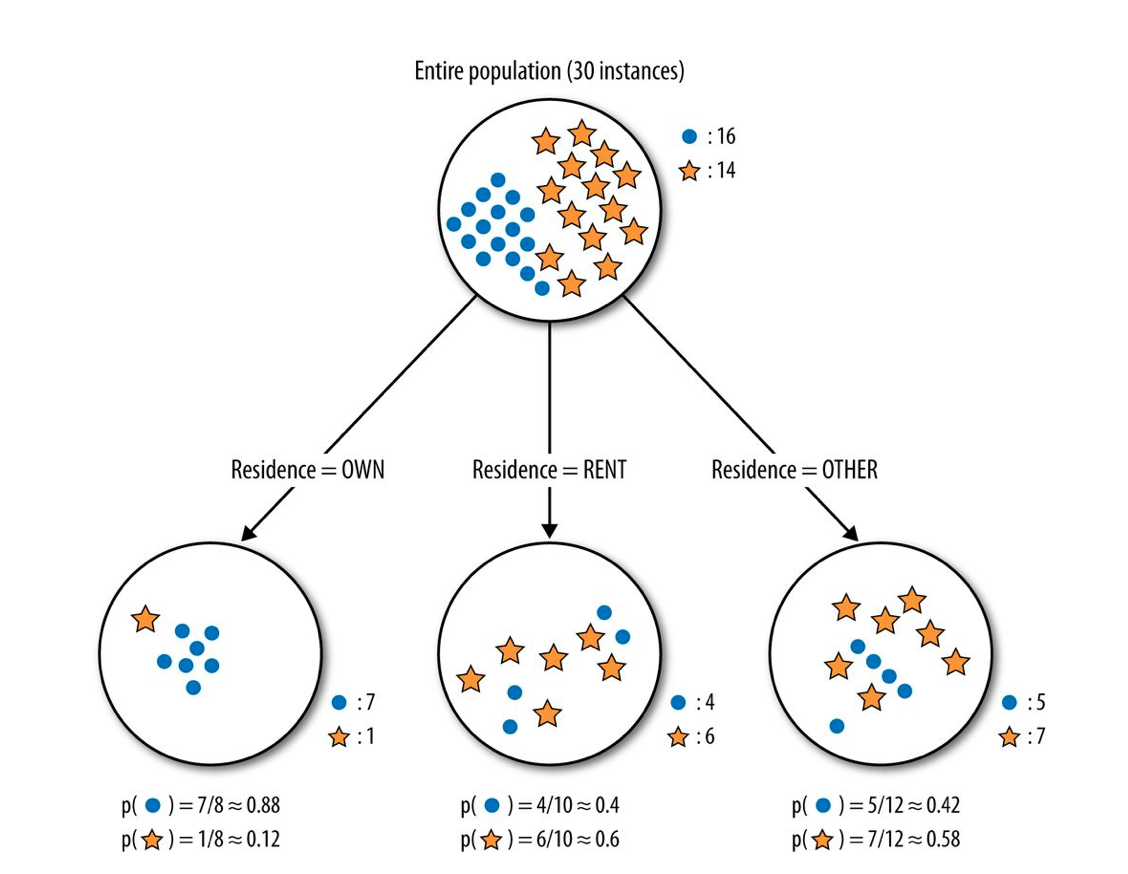

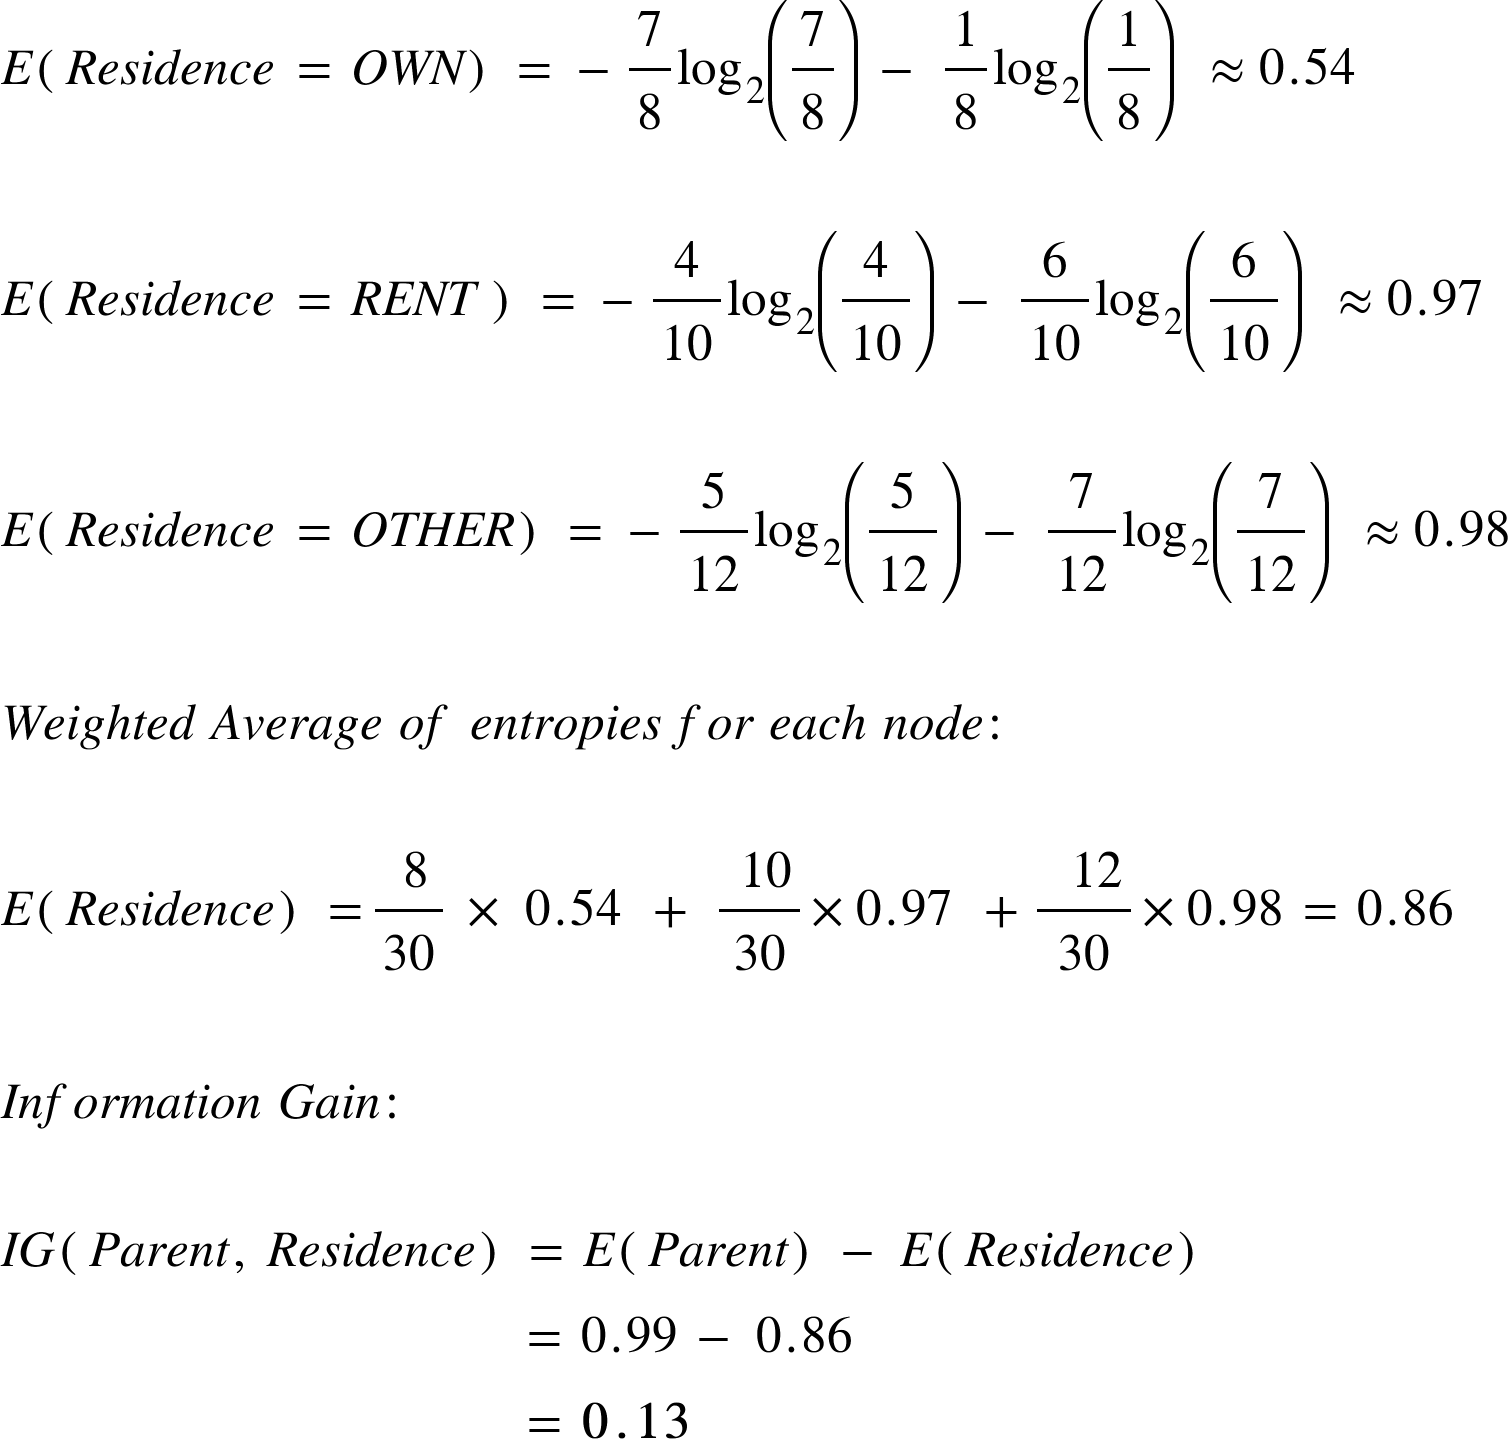

The information gain of  the feature *residence* gave us 0.13 and this  is not optimal, in comparisson to our other feature *balance/account balance* 
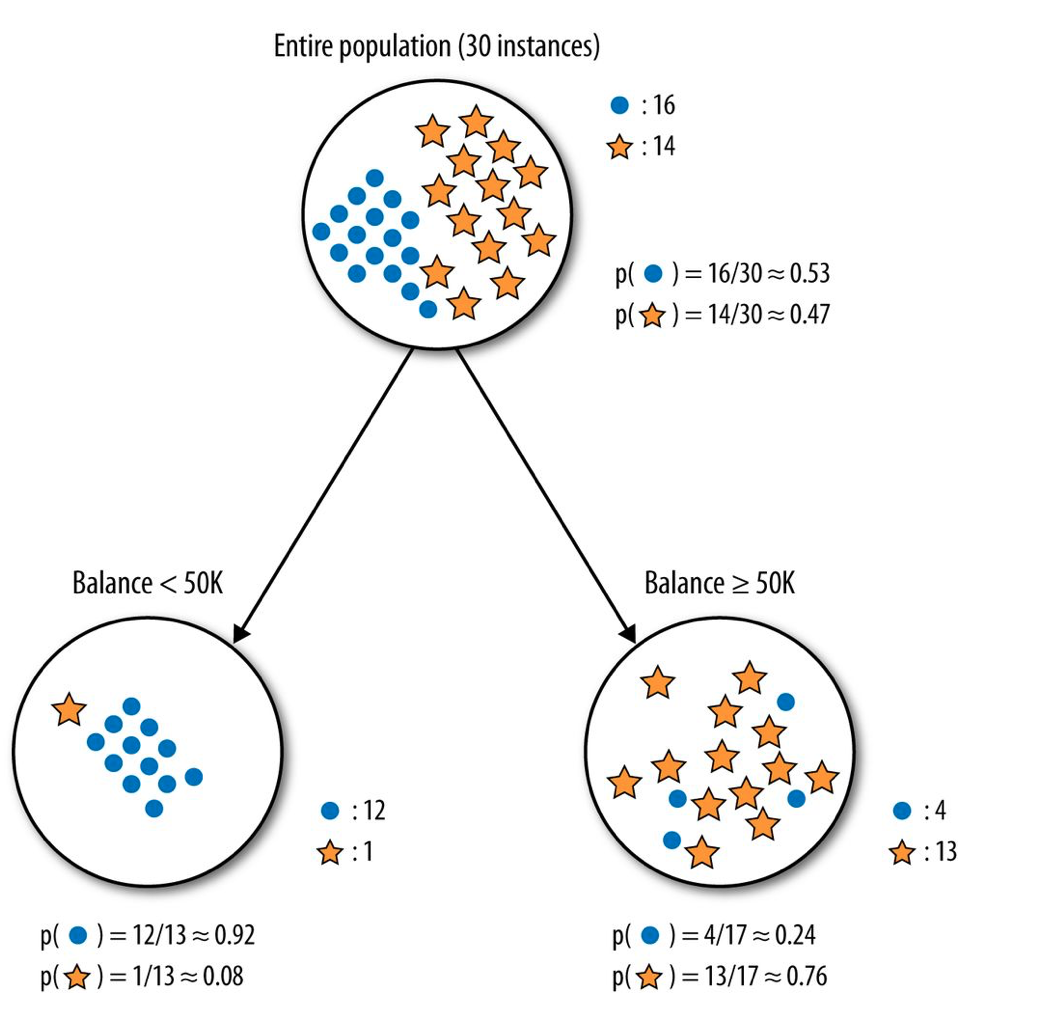

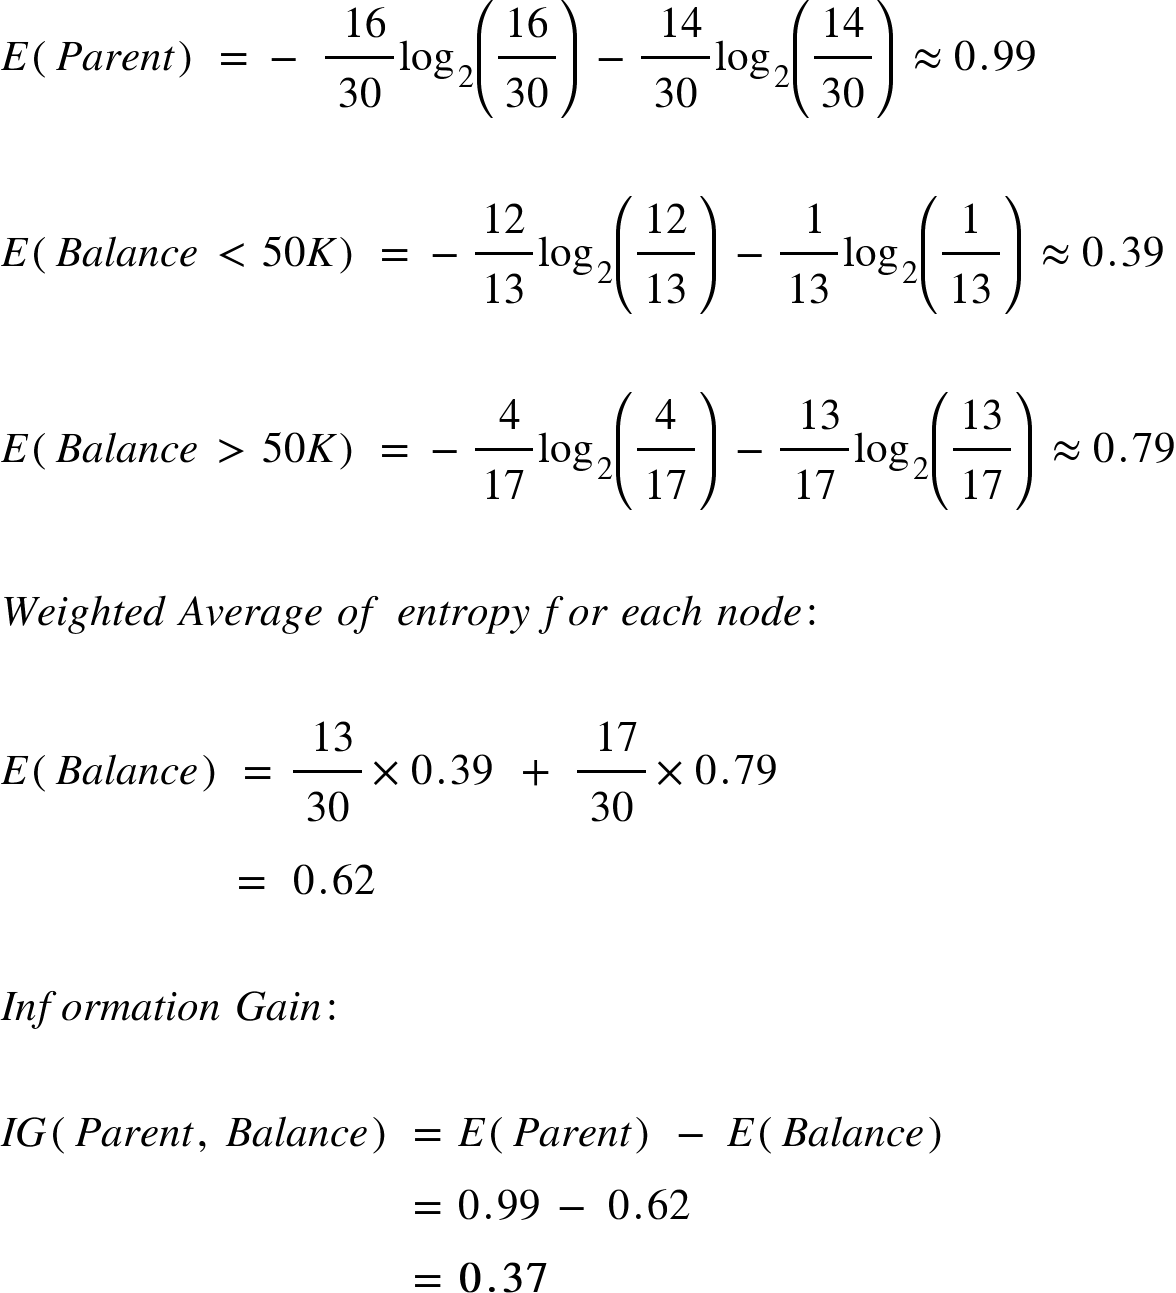

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
!pip install pandas


     |████████████████████████████████| 10.1MB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 512kB 13.9MB/s eta 0:00:01


In [92]:
#no feature names are given... so i have to make up my own
colnames = ['engine capacity', 'secondary engine capacity', 'engine power', 'secondary engine power', 'car size', 'miles per gallon', 'class']
df = pd.read_csv('data.data', names=colnames)

In [93]:
df.head(5)

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   engine capacity            1728 non-null   object
 1   secondary engine capacity  1728 non-null   object
 2   engine power               1728 non-null   object
 3   secondary engine power     1728 non-null   object
 4   car size                   1728 non-null   object
 5   miles per gallon           1728 non-null   object
 6   class                      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [95]:
df.describe()

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [96]:
df['engine power'] = pd.to_numeric(df['engine power'], errors='coerce')

In [97]:
df['secondary engine power'] = pd.to_numeric(df['secondary engine power'], errors='coerce')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   engine capacity            1728 non-null   object 
 1   secondary engine capacity  1728 non-null   object 
 2   engine power               1296 non-null   float64
 3   secondary engine power     1152 non-null   float64
 4   car size                   1728 non-null   object 
 5   miles per gallon           1728 non-null   object 
 6   class                      1728 non-null   object 
dtypes: float64(2), object(5)
memory usage: 94.6+ KB


In [99]:
#great successs we used an coerce to set all invalid parsing to name

In [100]:
df['engine power'].value_counts()

4.0    432
3.0    432
2.0    432
Name: engine power, dtype: int64

In [101]:
df['secondary engine power'].value_counts()

4.0    576
2.0    576
Name: secondary engine power, dtype: int64

In [102]:
#Very nice 

In [103]:
df

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
0,vhigh,vhigh,2.0,2.0,small,low,unacc
1,vhigh,vhigh,2.0,2.0,small,med,unacc
2,vhigh,vhigh,2.0,2.0,small,high,unacc
3,vhigh,vhigh,2.0,2.0,med,low,unacc
4,vhigh,vhigh,2.0,2.0,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,NaN,NaN,med,med,good
1724,low,low,NaN,NaN,med,high,vgood
1725,low,low,NaN,NaN,big,low,unacc
1726,low,low,NaN,NaN,big,med,good


In [104]:
%matplotlib inline

In [105]:
!pip install seaborn

In [106]:
import seaborn as sns


/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


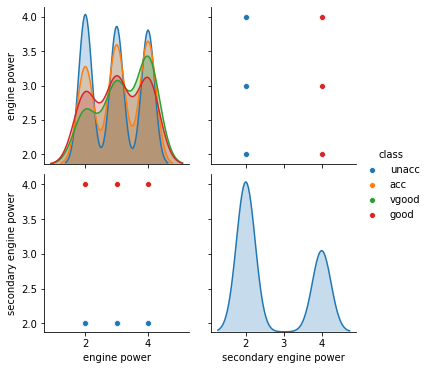

In [107]:
sns.pairplot(df, hue='class')

In [108]:
!pip install sklearn

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# now we have to use onehotencoding to process the data from categoriacal data
# into numerical data
from sklearn.preprocessing import LabelEncoder


In [115]:
le = LabelEncoder()
df

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
0,vhigh,vhigh,2.0,2.0,small,low,unacc
1,vhigh,vhigh,2.0,2.0,small,med,unacc
2,vhigh,vhigh,2.0,2.0,small,high,unacc
3,vhigh,vhigh,2.0,2.0,med,low,unacc
4,vhigh,vhigh,2.0,2.0,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,NaN,NaN,med,med,good
1724,low,low,NaN,NaN,med,high,vgood
1725,low,low,NaN,NaN,big,low,unacc
1726,low,low,NaN,NaN,big,med,good


In [116]:
X = df.drop('class', axis=1)

In [121]:
y = df['class']

In [122]:
X

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon
0,vhigh,vhigh,2.0,2.0,small,low
1,vhigh,vhigh,2.0,2.0,small,med
2,vhigh,vhigh,2.0,2.0,small,high
3,vhigh,vhigh,2.0,2.0,med,low
4,vhigh,vhigh,2.0,2.0,med,med
...,...,...,...,...,...,...
1723,low,low,NaN,NaN,med,med
1724,low,low,NaN,NaN,med,high
1725,low,low,NaN,NaN,big,low
1726,low,low,NaN,NaN,big,med


In [123]:
df.dropna()

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
0,vhigh,vhigh,2.0,2.0,small,low,unacc
1,vhigh,vhigh,2.0,2.0,small,med,unacc
2,vhigh,vhigh,2.0,2.0,small,high,unacc
3,vhigh,vhigh,2.0,2.0,med,low,unacc
4,vhigh,vhigh,2.0,2.0,med,med,unacc
...,...,...,...,...,...,...,...
1687,low,low,4.0,4.0,med,med,good
1688,low,low,4.0,4.0,med,high,vgood
1689,low,low,4.0,4.0,big,low,unacc
1690,low,low,4.0,4.0,big,med,good


In [131]:

df[['engine capacity', 'secondary engine capacity', 'car size', 'miles per gallon', 'class']] = df[['engine capacity', 'secondary engine capacity', 'car size', 'miles per gallon', 'class']].apply(le.fit_transform)
#label encode all the non numeric columns

In [135]:
df.dropna(inplace=True)

In [137]:
df

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon,class
0,3,3,2.0,2.0,2,1,2
1,3,3,2.0,2.0,2,2,2
2,3,3,2.0,2.0,2,0,2
3,3,3,2.0,2.0,1,1,2
4,3,3,2.0,2.0,1,2,2
...,...,...,...,...,...,...,...
1687,1,1,4.0,4.0,1,2,1
1688,1,1,4.0,4.0,1,0,3
1689,1,1,4.0,4.0,0,1,2
1690,1,1,4.0,4.0,0,2,1


In [154]:
X = df.drop('class', axis=1)

In [155]:
y = df['class']

In [156]:
X_train

,engine capacity,secondary engine capacity,engine power,secondary engine power,car size,miles per gallon
1291,med,low,NaN,NaN,med,med
1566,low,med,4.0,2.0,small,low
1507,low,high,NaN,NaN,med,med
808,high,low,3.0,NaN,big,med
1600,low,med,NaN,2.0,big,med
...,...,...,...,...,...,...
599,high,high,4.0,2.0,med,high
1599,low,med,NaN,2.0,big,low
1361,low,vhigh,4.0,4.0,small,high
1547,low,med,3.0,2.0,big,high


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dtree = DecisionTreeClassifier()

In [160]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [161]:
sns.pairplot(hue='class')

AttributeError: 'DataFrame' object has no attribute 'pairplot'

/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kristoffer/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


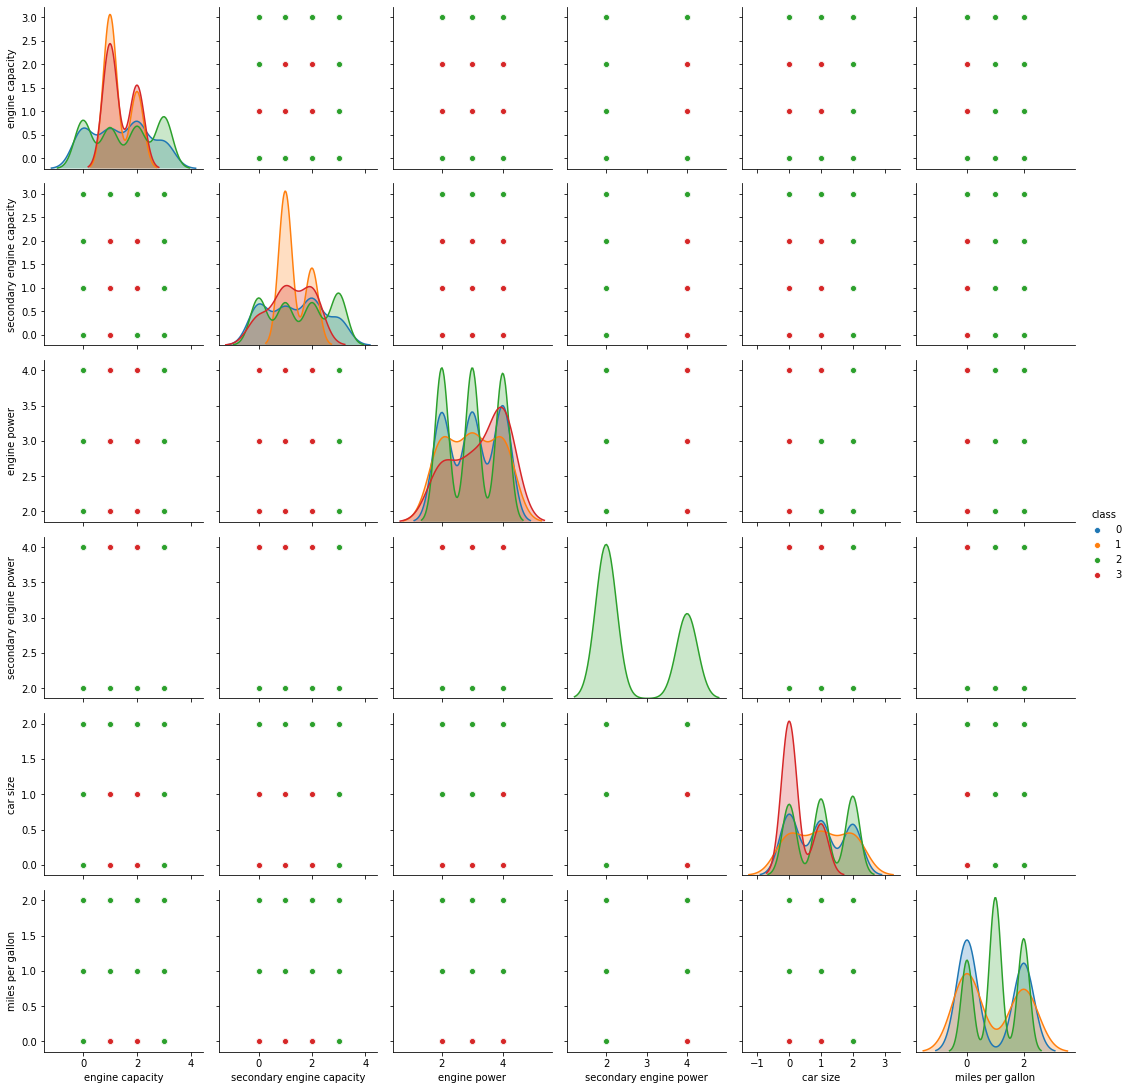

In [162]:
sns.pairplot(df, hue='class')

In [163]:
predictions = dtree.predict(X_test)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 41   0   4   2]
 [  1  11   0   0]
 [  1   0 223   0]
 [  0   0   0   3]]


              precision    recall  f1-score   support

           0       0.95      0.87      0.91        47
           1       1.00      0.92      0.96        12
           2       0.98      1.00      0.99       224
           3       0.60      1.00      0.75         3

    accuracy                           0.97       286
   macro avg       0.88      0.95      0.90       286
weighted avg       0.97      0.97      0.97       286



In [167]:
#As you can see our model is extremely accurate, 

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rfc = RandomForestClassifier(n_estimators=200)

In [171]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
rfc_pred = rfc.predict(X_test)

In [173]:
print(confusion_matrix(y_test, rfc_pred))
print("\n")
print(classification_report(y_test, rfc_pred))

[[ 35   0  12   0]
 [  8   4   0   0]
 [  2   0 222   0]
 [  0   0   0   3]]


              precision    recall  f1-score   support

           0       0.78      0.74      0.76        47
           1       1.00      0.33      0.50        12
           2       0.95      0.99      0.97       224
           3       1.00      1.00      1.00         3

    accuracy                           0.92       286
   macro avg       0.93      0.77      0.81       286
weighted avg       0.92      0.92      0.92       286



In [174]:
#actually predictions where a little bit worse here

the reason the decision tree might have performed slightly better is becasue this dataset is relativly small and simple. Not much

In [ ]:
#the dataset